In [1]:
from google.colab import drive
drive.mount("/content/gdrive", force_remount=True)

Mounted at /content/gdrive


In [2]:
%cd '/content/gdrive/MyDrive/DL07_K304_ĐaoTuanThinh_TruongVanLe/Project2'

/content/gdrive/MyDrive/DL07_K304_ĐaoTuanThinh_TruongVanLe/Project2


In [3]:
!pip install streamlit

In [4]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score,  precision_score, recall_score, f1_score, roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.compose import ColumnTransformer
import warnings
warnings.filterwarnings("ignore")
from scipy.sparse import hstack
from sklearn.utils import resample
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from xgboost import XGBClassifier
from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import streamlit as st
from collections import Counter

### Chuẩn bị dữ liệu

In [5]:
file_path = '/content/gdrive/MyDrive/DL07_K304_ĐaoTuanThinh_TruongVanLe/Project2/final_data.xlsx'

In [6]:
# Đọc dữ liệu
data = pd.read_excel(file_path)
# Xem 5 dòng đầu
data.head()


,Company Name,Title,What I liked,Suggestions for improvement,Rating,Salary & benefits,Training & learning,Management cares about me,Culture & fun,Office & workspace,...,Company size,Country,Working days,Overtime Policy,text_for_processing,processed,positive_word_count,negative_word_count,label,label_encoded
0,Accenture,"Môi trường thoải mái, ít áp lực, có thể làm vi...","Môi trường thoải mái, ít áp lực, có thể làm vi...",Cần đánh giá KPI khách quan và phân chia công ...,4,4,4,4,4,4,...,301-500 employees,Vietnam,Monday - Friday,No OT,"Môi trường thoải mái, ít áp lực, có thể làm vi...",môi_trường thoải_mái áp_lực làm_việc hybrid lư...,7,1,positive,2
1,Accenture,Công ty trẻ trung năng động,"Cơ sở vật chất đẹp, công ty trẻ trung năng độn...",Nên nghiên cứu lại range lương của thì trường....,4,3,4,4,4,5,...,301-500 employees,Vietnam,Monday - Friday,No OT,"Cơ sở vật chất đẹp, công ty trẻ trung năng độn...",cơ_sở_vật_chất đẹp trẻ chế_độ làm_việc hybrid ...,0,0,positive,2
2,Accenture,Môi trường làm việc thoải mái vui vẻ,"Mội người thân thiện, giúp đỡ lẫn nhau. Chương...",Do công ty làm outsourcing về mảng system nên ...,3,3,3,3,3,3,...,301-500 employees,Vietnam,Monday - Friday,No OT,"Mội người thân thiện, giúp đỡ lẫn nhau. Chương...",mội thân_thiện giúp_đỡ lẫn chương_trình intern...,6,0,positive,2
3,Accenture,good environment for fresher,good env. for fresher to learn and improve the...,Need to forcus more on benefit and evaluate co...,3,2,2,3,4,4,...,301-500 employees,Vietnam,Monday - Friday,No OT,good env. for fresher to learn and improve the...,fresher learn ability opened linh_động teams c...,0,0,neutral,1
4,Accenture,"Môi trường làm việc thoải mái, vui vẻ","- Văn phòng đẹp, cơ sở vật chất tốt\n- Sếp và ...",- Phát triển văn phòng để rộng rãi hơn\n- Công...,4,3,4,4,4,3,...,301-500 employees,Vietnam,Monday - Friday,No OT,"- Văn phòng đẹp, cơ sở vật chất tốt\n- Sếp và ...",văn_phòng đẹp cơ_sở vật_chất tốt_sếp đồng_nghi...,7,0,positive,2


In [7]:
# Xem kích thước dữ liệu
data.shape

(8411, 22)

In [8]:
# Xem thông tin cơ bản
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8411 entries, 0 to 8410
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Company Name                 8411 non-null   object
 1   Title                        8411 non-null   object
 2   What I liked                 8411 non-null   object
 3   Suggestions for improvement  8411 non-null   object
 4   Rating                       8411 non-null   int64 
 5   Salary & benefits            8411 non-null   int64 
 6   Training & learning          8411 non-null   int64 
 7   Management cares about me    8411 non-null   int64 
 8   Culture & fun                8411 non-null   int64 
 9   Office & workspace           8411 non-null   int64 
 10  Recommend                    8411 non-null   object
 11  Company Type                 8411 non-null   object
 12  Company size                 8411 non-null   object
 13  Country                      8411

## 📊 Phân tích EDA và WordCloud

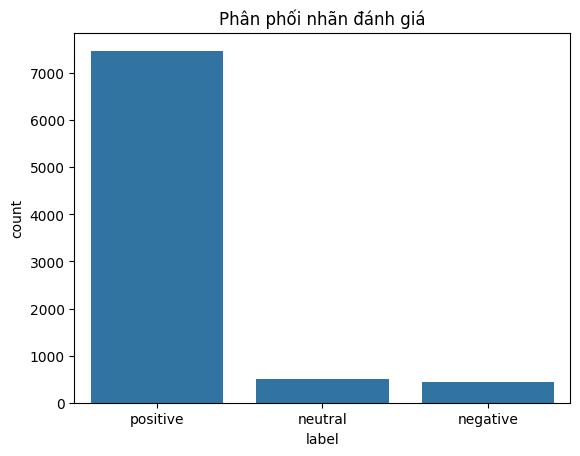

TypeError: sequence item 132: expected str instance, float found

In [9]:
sns.countplot(data=data, x='label')
plt.title("Phân phối nhãn đánh giá")
plt.show()

for sentiment in ['positive', 'neutral', 'negative']:
    text = " ".join(data[data['label'] == sentiment]['processed'])
    wc = WordCloud(width=800, height=400, background_color = 'white').generate(text)
    plt.imshow(wc)
    plt.axis('off')
    plt.title(f"WordCloud - {sentiment.capitalize()}")
    plt.show()

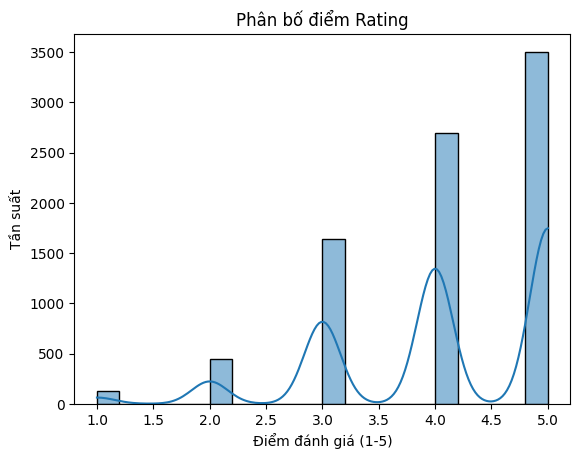

In [10]:
sns.histplot(data=data, x='Rating', bins=20, kde=True)
plt.title('Phân bố điểm Rating')
plt.xlabel('Điểm đánh giá (1-5)')
plt.ylabel('Tần suất') # Nên thêm nhãn cho trục y
plt.show()

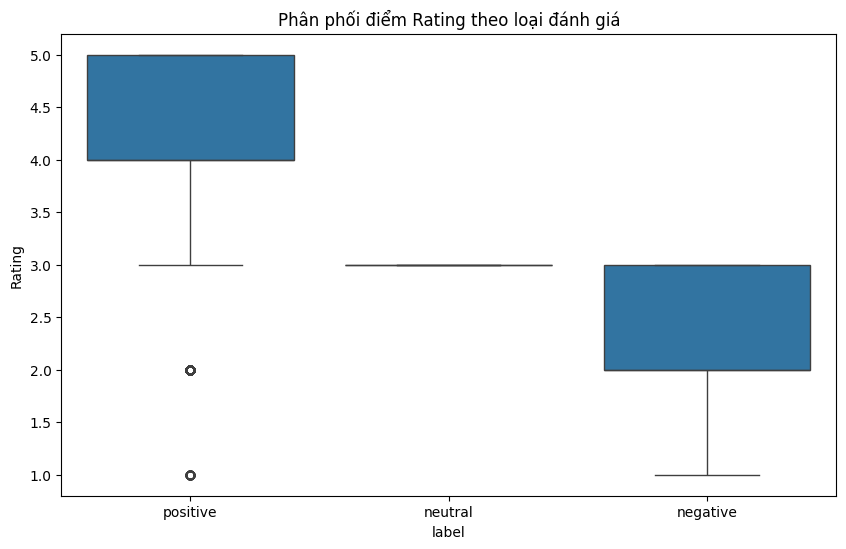

In [11]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.boxplot(x='label', y='Rating', data=data, order=['positive', 'neutral', 'negative'], ax=ax)
plt.title('Phân phối điểm Rating theo loại đánh giá')
plt.show()

In [12]:
data['target'] = data['Recommend'].apply(lambda x: 1 if x == 'Yes' else 0)

In [13]:
data.head(2)

,Company Name,Title,What I liked,Suggestions for improvement,Rating,Salary & benefits,Training & learning,Management cares about me,Culture & fun,Office & workspace,...,Country,Working days,Overtime Policy,text_for_processing,processed,positive_word_count,negative_word_count,label,label_encoded,target
0,Accenture,"Môi trường thoải mái, ít áp lực, có thể làm vi...","Môi trường thoải mái, ít áp lực, có thể làm vi...",Cần đánh giá KPI khách quan và phân chia công ...,4,4,4,4,4,4,...,Vietnam,Monday - Friday,No OT,"Môi trường thoải mái, ít áp lực, có thể làm vi...",môi_trường thoải_mái áp_lực làm_việc hybrid lư...,7,1,positive,2,1
1,Accenture,Công ty trẻ trung năng động,"Cơ sở vật chất đẹp, công ty trẻ trung năng độn...",Nên nghiên cứu lại range lương của thì trường....,4,3,4,4,4,5,...,Vietnam,Monday - Friday,No OT,"Cơ sở vật chất đẹp, công ty trẻ trung năng độn...",cơ_sở_vật_chất đẹp trẻ chế_độ làm_việc hybrid ...,0,0,positive,2,1


## 🧪 Feature Engineering & TF-IDF + kết hợp đặc trưng

In [16]:
# TF-IDF
# tfidf = TfidfVectorizer(max_features=500)
# X_text = tfidf.fit_transform(data['processed'])

numeric_features = [
    'Rating', 'Salary & benefits', 'Training & learning',
    'Management cares about me', 'Culture & fun', 'Office & workspace'
]
numeric_df = data[numeric_features]

# Clustering với KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
data['cluster'] = kmeans.fit_predict(numeric_df)

# Chuẩn bị dữ liệu cho ML
features = numeric_features + ['cluster', 'positive_word_count', 'negative_word_count']
categorical_features = ['Company Type', 'Company size', 'Country']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

X = data[features + categorical_features]
y = data['target']

## ⚖️ Xử lý mất cân bằng

In [ ]:
# # Resample để cân bằng các lớp trong tập train
# train_df = data.loc[y_train.index] if hasattr(y_train, 'index') else df.iloc[y_train.index]
# df_min = train_df[train_df['label_encoded'] == train_df['label_encoded'].value_counts().idxmin()]
# df_max = train_df[train_df['label_encoded'] == train_df['label_encoded'].value_counts().idxmax()]
# resampled = resample(df_min, replace=True, n_samples=len(df_max), random_state=42)
# df_bal = pd.concat([df_max, resampled])
# X_train = hstack([
#     tfidf.transform(df_bal['processed']),
#     scaler.transform(df_bal[num_cols])
# ])
# y_train = df_bal['label_encoded']

## 🤖 Huấn luyện và đánh giá mô hình ML

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Kiểm tra mất cân bằng
# if y_train.value_counts().min() / y_train.value_counts().max() < 0.3:
#     smote = SMOTE(random_state=42)
#     X_train, y_train = smote.fit_resample(X_train, y_train)

# Bước 4: Huấn luyện mô hình (Scikit-learn)
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100),
    "Support Vector Machine": SVC(probability=True, random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5),
    "Decision Tree": DecisionTreeClassifier(random_state=42)

}

results = {}
for name, model in models.items():
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', model)
    ])
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)

    results[name] = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1": f1_score(y_test, y_pred),
        "AUC": roc_auc_score(y_test, y_pred)
    }


In [18]:
# In kết quả
print("Results:")
pd.DataFrame(results).T

Results:


,Accuracy,Precision,Recall,F1,AUC
Logistic Regression,0.936423,0.943907,0.986523,0.964745,0.774668
Random Forest,0.931670,0.943042,0.981806,0.962034,0.769797
Gradient Boosting,0.935829,0.944444,0.985175,0.964380,0.776507
Support Vector Machine,0.934641,0.939258,0.989892,0.963911,0.756253
K-Nearest Neighbors,0.925728,0.934185,0.985175,0.959003,0.733794
Decision Tree,0.901367,0.944070,0.944070,0.944070,0.763492


## Pyspark

In [19]:
!apt update
!apt-get install openjdk-11-jdk-headless -qq > /dev/null
!wget -q http://archive.apache.org/dist/spark/spark-3.3.0/spark-3.3.0-bin-hadoop3.tgz
!tar -xvf spark-3.3.0-bin-hadoop3.tgz
!pip install -q findspark
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-11-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.3.0-bin-hadoop3"
import findspark
findspark.init()

Hit:1 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:2 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:3 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:5 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:6 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:7 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
38 packages can be upgraded. Run 'apt list --upgradable' to see them.
W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InR

Exception: Unable to find py4j in /content/spark-3.3.0-bin-hadoop3/python, your SPARK_HOME may not be configured correctly

In [ ]:
from pyspark.sql import SparkSession
from pyspark import SparkContext
from pyspark.sql import SQLContext
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.ml.recommendation import ALS
from pyspark.sql.functions import col
from pyspark.ml.feature import VectorAssembler, StringIndexer, OneHotEncoder as SparkOHE
from pyspark.ml.classification import LogisticRegression as SparkLR, RandomForestClassifier as SparkRFC, GBTClassifier
from pyspark.ml import Pipeline as SparkPipeline
from pyspark.ml.evaluation import BinaryClassificationEvaluator, MulticlassClassificationEvaluator
from pyspark.ml import Pipeline as SparkPipeline
from pyspark.ml.feature import VectorAssembler, StringIndexer, Tokenizer, StopWordsRemover, HashingTF, IDF

In [ ]:
SparkContext.setSystemProperty('spark.executor.memory', '12g')
sc = SparkContext(master='local', appName='Recommendation')

In [ ]:
spark = SparkSession(sc)